In [35]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#import seaborn as sns
import sklearn

In [36]:
train = pd.read_csv(r"file location\Train_data.csv")

In [37]:
print(train.head(4))
print("Training data has {} rows & {} columns".format(train.shape[0],train.shape[1]))

   duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0         0           tcp  ftp_data   SF        491          0     0   
1         0           udp     other   SF        146          0     0   
2         0           tcp   private   S0          0          0     0   
3         0           tcp      http   SF        232       8153     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0               0       0    0  ...                  25   
1               0       0    0  ...                   1   
2               0       0    0  ...                  26   
3               0       0    0  ...                 255   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                    0.17                    0.03   
1                    0.00                    0.60   
2                    0.10                    0.05   
3                    1.00                    0.00   

   dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0             

In [38]:
include =['object', 'float', 'int'] 
train.describe( include = include)


,protocol_type,service,flag,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192,25192,25192,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
unique,3,66,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,tcp,http,SF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,20526,8003,14973,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,0.286338,0.283762,0.118630,0.120260,0.660559,0.062363,0.095931,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,NaN,NaN,NaN,0.447312,0.447599,0.318745,0.322335,0.439637,0.178550,0.256583,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.090000,0.000000,0.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,NaN,NaN,1.000000,1.000000,0.000000,0.000000,1.000000,0.060000,0.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000


In [39]:
print(train['num_outbound_cmds'].value_counts())

0    25192
Name: num_outbound_cmds, dtype: int64


In [40]:
train.drop(['num_outbound_cmds'], axis=1, inplace=True)

In [41]:
train['class'].value_counts()
#0 = normal
#1 = anomaly

0    13449
1    11743
Name: class, dtype: int64

In [42]:
train.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate                float64
rerror_rate              

In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# extract numerical attributes and scale it to have zero mean and unit variance  
cols = train.select_dtypes(include=['float64','int64']).columns

sc_train = scaler.fit_transform(train.select_dtypes(include=['float64','int64']))

# turn the result back to a dataframe
sc_traindf = pd.DataFrame(sc_train, columns = cols)

In [44]:
sc_traindf

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,-0.113551,-0.009889,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,-0.021873,...,-0.813985,-0.779157,-0.280673,0.073120,-0.287993,-0.641804,-0.627365,-0.221668,-0.374281,-0.934425
1,-0.113551,-0.010032,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,-0.021873,...,-1.030895,-1.157831,2.764403,2.375620,-0.287993,-0.641804,-0.627365,-0.385140,-0.374281,-0.934425
2,-0.113551,-0.010093,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,-0.021873,...,-0.804947,-0.935081,-0.173828,-0.478183,-0.287993,1.603834,1.614454,-0.385140,-0.374281,1.070177
3,-0.113551,-0.009996,0.052473,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,1.238197,-0.021873,...,1.264742,1.069663,-0.440940,-0.380894,0.073759,-0.574435,-0.604947,-0.385140,-0.342768,-0.934425
4,-0.113551,-0.010010,-0.034582,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,1.238197,-0.021873,...,1.264742,1.069663,-0.440940,-0.478183,-0.287993,-0.641804,-0.627365,-0.385140,-0.374281,-0.934425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,-0.113551,-0.010093,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,-0.021873,...,-0.976667,-1.091006,-0.120406,-0.478183,-0.287993,-0.641804,-0.627365,2.884296,2.777041,1.070177
25188,-0.113551,-0.009954,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,1.238197,-0.021873,...,-0.687453,1.069663,-0.440940,2.764775,1.339894,-0.641804,-0.627365,-0.385140,-0.374281,1.070177
25189,-0.113551,-0.010093,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,-0.021873,...,-0.922440,-1.046456,-0.066984,-0.478183,-0.287993,-0.641804,-0.627365,2.884296,2.777041,1.070177
25190,-0.113551,-0.010093,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,-0.021873,...,-0.859174,-0.979631,-0.120406,-0.478183,-0.287993,1.603834,1.614454,-0.385140,-0.374281,1.070177


In [45]:
class_Ytrain = sc_traindf[['class']].copy()

In [46]:
class_Ytrain

,class
0,-0.934425
1,-0.934425
2,1.070177
3,-0.934425
4,-0.934425
...,...
25187,1.070177
25188,1.070177
25189,1.070177
25190,1.070177


In [47]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

# extract categorical attributes from both training and test sets 
classtrain = train.select_dtypes(include=['object']).copy()

# encode the categorical attributes
trainclass = classtrain.apply(encoder.fit_transform)


In [48]:
trainclass

,protocol_type,service,flag
0,1,19,9
1,2,41,9
2,1,46,5
3,1,22,9
4,1,22,9
...,...,...,...
25187,1,16,2
25188,1,19,9
25189,1,46,1
25190,1,38,5


In [49]:
train_x = pd.concat([sc_traindf,trainclass],axis=1)
train_y = train['class']
train_x.shape

(25192, 41)

In [50]:
train_y

0        0
1        0
2        1
3        0
4        0
        ..
25187    1
25188    1
25189    1
25190    1
25191    1
Name: class, Length: 25192, dtype: int64

In [51]:
train_y.dtypes

dtype('int64')

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(train_x, train_y, test_size=0.3, random_state=42)


In [53]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)


In [54]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)


(17634, 41) (3779, 41) (3779, 41) (17634,) (3779,) (3779,)


In [55]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, MaxPooling1D
from keras.utils import np_utils
import h5py
from keras import callbacks
from keras.callbacks import CSVLogger
from keras.callbacks import EarlyStopping, CSVLogger

model = Sequential()
model.add(Dense(10, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
model.add(Dense(50, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
model.add(Dense(10, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
model.add(Dense(1 ,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=10, verbose=1, mode='auto')
hist = model.fit(X_train,Y_train,validation_data=(X_test,Y_test),callbacks=[monitor],verbose=2,epochs=15)


Train on 17634 samples, validate on 3779 samples
Epoch 1/15
 - 5s - loss: 0.2045 - acc: 0.9114 - val_loss: 0.0095 - val_acc: 0.9992
Epoch 2/15
 - 2s - loss: 0.0028 - acc: 0.9996 - val_loss: 0.0052 - val_acc: 0.9992
Epoch 3/15
 - 2s - loss: 0.0013 - acc: 0.9996 - val_loss: 0.0034 - val_acc: 0.9997
Epoch 4/15
 - 2s - loss: 2.1213e-04 - acc: 0.9999 - val_loss: 0.0035 - val_acc: 0.9997
Epoch 5/15
 - 2s - loss: 1.6190e-04 - acc: 0.9999 - val_loss: 0.0035 - val_acc: 0.9997
Epoch 6/15
 - 2s - loss: 1.4077e-04 - acc: 0.9999 - val_loss: 0.0035 - val_acc: 0.9997
Epoch 7/15
 - 2s - loss: 1.3092e-04 - acc: 0.9999 - val_loss: 0.0035 - val_acc: 0.9997
Epoch 8/15
 - 2s - loss: 1.2495e-04 - acc: 0.9999 - val_loss: 0.0035 - val_acc: 0.9997
Epoch 00008: early stopping


In [56]:
model.evaluate(X_test, Y_test)[1]


3779/3779 [==============================] - 0s 64us/step


0.9997353797300873

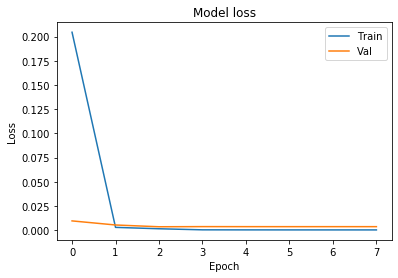

In [57]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()


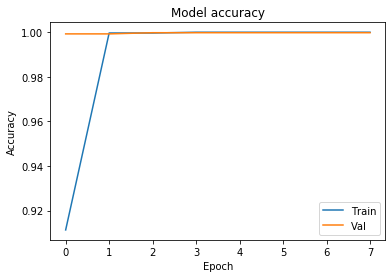

In [58]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()
